In [5]:
from module.EmbeddedAttackModel import EmbeddedAttackModel, TargetModel, AttackHelper
from module.utils import * 
from module.gs_mim import GradSmoothMomentumIterativeMethod
from cleverhans.attacks import MomentumIterativeMethod
%matplotlib inline
import numpy as np

batch_shape = (60, 224, 224, 3)
datag = dev_data_generater(batch_shape=batch_shape)
_,X,Y = next(datag)

In [6]:
name = 'inception_v1'
T1 = TargetModel(batch_shape, 110, name=name)
T1.predict(X, Y)

INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt


ResourceExhaustedError: OOM when allocating tensor with shape[60,64,112,112] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node InceptionV1/InceptionV1/Conv2d_1a_7x7/Conv2D (defined at C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py:1057)  = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 2, 2], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](InceptionV1/InceptionV1/Conv2d_1a_7x7/Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer, InceptionV1/Conv2d_1a_7x7/weights/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node ArgMax_1/_471}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1001_ArgMax_1", tensor_type=DT_INT64, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'InceptionV1/InceptionV1/Conv2d_1a_7x7/Conv2D', defined at:
  File "C:\ProgramData\Miniconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Miniconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Miniconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\ProgramData\Miniconda3\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "C:\ProgramData\Miniconda3\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "C:\ProgramData\Miniconda3\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "C:\ProgramData\Miniconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "C:\ProgramData\Miniconda3\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "C:\ProgramData\Miniconda3\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\ProgramData\Miniconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\ProgramData\Miniconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\ProgramData\Miniconda3\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Miniconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3191, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-eab40d3616c5>", line 3, in <module>
    T1.predict(X, Y)
  File "D:\Develop\IJCAI2019\IJCAI19_AliAAAC\module\EmbeddedAttackModel.py", line 110, in predict
    op_logits = self.get_endpoints(x, self.nb_classes)['Logits']
  File "D:\Develop\IJCAI2019\IJCAI19_AliAAAC\module\official_model_v3.py", line 83, in get_endpoints
    logits, end_points = self._model['graph'](x, num_classes=nb_classes,is_training=False,reuse=tf.AUTO_REUSE)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\contrib\slim\python\slim\nets\inception_v1.py", line 346, in inception_v1
    net, end_points = inception_v1_base(inputs, scope=scope)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\contrib\slim\python\slim\nets\inception_v1.py", line 67, in inception_v1_base
    net = layers.conv2d(inputs, 64, [7, 7], stride=2, scope=end_point)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\contrib\framework\python\ops\arg_scope.py", line 182, in func_with_args
    return func(*args, **current_args)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py", line 1154, in convolution2d
    conv_dims=2)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\contrib\framework\python\ops\arg_scope.py", line 182, in func_with_args
    return func(*args, **current_args)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py", line 1057, in convolution
    outputs = layer.apply(inputs)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 817, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\layers\base.py", line 374, in __call__
    outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 757, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\keras\layers\convolutional.py", line 194, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 868, in __call__
    return self.conv_op(inp, filter)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 520, in __call__
    return self.call(inp, filter)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 204, in __call__
    name=self.name)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 957, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3274, in create_op
    op_def=op_def)
  File "C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[60,64,112,112] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node InceptionV1/InceptionV1/Conv2d_1a_7x7/Conv2D (defined at C:\ProgramData\Miniconda3\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py:1057)  = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 2, 2], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](InceptionV1/InceptionV1/Conv2d_1a_7x7/Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer, InceptionV1/Conv2d_1a_7x7/weights/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node ArgMax_1/_471}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1001_ArgMax_1", tensor_type=DT_INT64, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [2]:
name = 'inception_v1'
T1 = TargetModel(batch_shape, 110, name=name)
name = 'resnetv1_50'
T2 = TargetModel(batch_shape, 110, name=name)
name = 'vgg_16'
T3 = TargetModel(batch_shape, 110, name=name)

{'ep_ratio': 0.2, 'nb_iter': 10, 'y': array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'eps': 51.0, 'eps_iter': 5.1, 'clip_min': 0, 'clip_max': 255}


C:\ProgramData\Miniconda3\lib\site-packages\cleverhans\attacks\__init__.py:886: UserWarning: kwargs is unused and will be removed on or after 2019-04-26.
  warnings.warn("kwargs is unused and will be removed on or after "


INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
INFO:tensorflow:Restoring parameters from ../official_data/model/resnet_v1_50/model.ckpt-49800
Attack runs: 25.60 s
L2 46.93059290714924
INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
inception_v1 predict runs: 2.91 s
inception_v1 predict accuracy : 0.0
INFO:tensorflow:Restoring parameters from ../official_data/model/resnet_v1_50/model.ckpt-49800
resnetv1_50 predict runs: 3.32 s
resnetv1_50 predict accuracy : 0.0


IndexError: index 2 is out of bounds for axis 0 with size 2

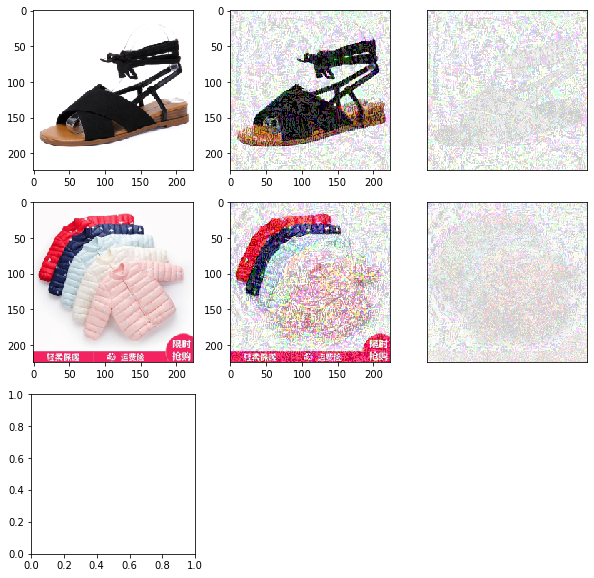

In [3]:
A = EmbeddedAttackModel(batch_shape, 110)
A.add_model(T1)
A.add_model(T2)
# A.add_model(T3)

attack_params = {"ep_ratio":0.2, "nb_iter":10, 'y':Y}
Xadv = AttackHelper(A, X, Y, MomentumIterativeMethod, attack_params)
# Xadv = AttackHelper(A, X, Y, GradSmoothMomentumIterativeMethod, attack_params)
plot_images(X, Xadv, n=3)

T3.predict(Xadv, Y)

{'ep_ratio': 0.3, 'nb_iter': 10, 'y': array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'eps': 76.5, 'eps_iter': 7.65, 'clip_min': 0, 'clip_max': 255}


D:\Develop\IJCAI2019\IJCAI19_AliAAAC\module\gs_mim.py:204: UserWarning: kwargs is unused and will be removed on or after 2019-04-26.
  warnings.warn("kwargs is unused and will be removed on or after "


INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
INFO:tensorflow:Restoring parameters from ../official_data/model/resnet_v1_50/model.ckpt-49800
Attack runs: 19.21 s
L2 46.44056023948076
INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
inception_v1 predict runs: 1.39 s
inception_v1 predict accuracy : 0.0
INFO:tensorflow:Restoring parameters from ../official_data/model/resnet_v1_50/model.ckpt-49800
resnetv1_50 predict runs: 1.80 s
resnetv1_50 predict accuracy : 0.0


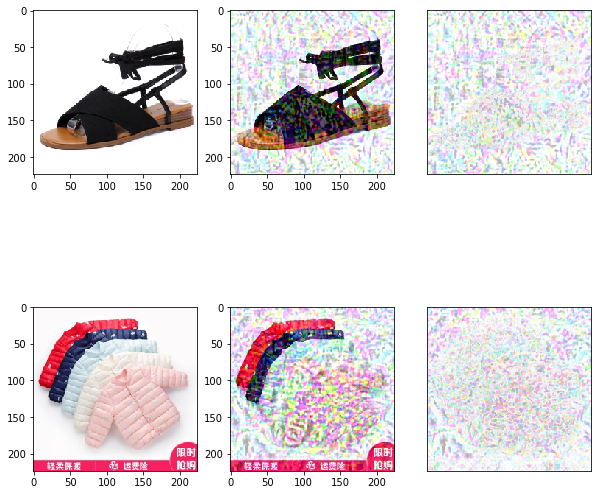

INFO:tensorflow:Restoring parameters from ../official_data/model/vgg_16/vgg_16.ckpt


InternalError: Dst tensor is not initialized.
	 [[{{node save/RestoreV2/_55}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_60_save/RestoreV2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

In [4]:
A = EmbeddedAttackModel(batch_shape, 110)
A.add_model(T1)
A.add_model(T2)
# A.add_model(T3)

attack_params = {"ep_ratio":0.3, "nb_iter":10, 'y':Y}
Xadv = AttackHelper(A, X, Y, GradSmoothMomentumIterativeMethod, attack_params)
plot_images(X, Xadv, n=2)

T3.predict(Xadv, Y)